In [220]:
import matplotlib.pyplot as plt
from erddapClient import ERDDAP_Griddap
from netCDF4 import Dataset
from matplotlib import colormaps
from pathlib import Path
import numpy as np
import xarray as xr
from pycurrents.file.binfile_n import BinfileSet


In [221]:
# Read in the data. 
file_id = Dataset('/home/jamie/projects/atlantic_sst/noaacwBLENDEDsstDNDaily_e5b2_b4c7_9276_U1717797277907.nc')
# print(file_id.variables)

In [222]:
def arrayrbins(files):
    mat = list()
    for i in files:
        tmp = BinfileSet(str(i))
        mat.append(tmp.array)
    mat = np.vstack(mat)
    return(mat) 

def readrbins(pth, sensor, tag):
    tag = "*" + tag + "*.rbin"
    files = sorted(Path(pth+sensor+"/").glob(tag))
    mat = arrayrbins(files)

    #cols = BinfileSet(str(files[0])).columns
    mat = np.array(mat) #, dtype=cols)
    return(mat)

In [223]:
# get gps location
# sea = readrbins(pth ='/home/jamie/projects/atlantic_sst/', sensor = 'seapath380', tag = 'gps')
sea = readrbins(pth ='/mnt/revelle-data/RR2407/adcp_uhdas/RR2407/rbin/', sensor = 'seapath380', tag = 'gps')
gyro = readrbins(pth ='/mnt/revelle-data/RR2407/adcp_uhdas/RR2407/rbin/', sensor = 'gyro', tag = 'hdg')

In [224]:
sst = file_id.variables["analysed_sst"][:]
lat = file_id.variables["latitude"][:]
lon = file_id.variables["longitude"][:]
mask = file_id.variables["mask"][:]
file_id.close()

In [225]:
sst = xr.DataArray(sst[0,:,:], 
                       coords={'x': lat, 'y':lon}, 
                       dims=["x", "y"])

mask = xr.DataArray(mask[0,:,:], 
                       coords={'x': lat, 'y':lon}, 
                       dims=["x", "y"])

In [226]:
# pull out most regent heading and convert to radians. 
theta = gyro[-1,1] *(np.pi/180) # to radians
pos = sea[-1]
prev_pos = sea[1:-1]

In [227]:
min_lon = pos[2] - 2
min_lat = pos[3] - 2 
max_lon = pos[2] + 2
max_lat = pos[3] + 2
mask_lon = (sst.y >= min_lon) & (sst.y <= max_lon)
mask_lat = (sst.x >= min_lat) & (sst.x <= max_lat)

sst_cut = sst.where(mask_lon & mask_lat, drop=True)
mask_cut = mask.where(mask_lon & mask_lat, drop=True)

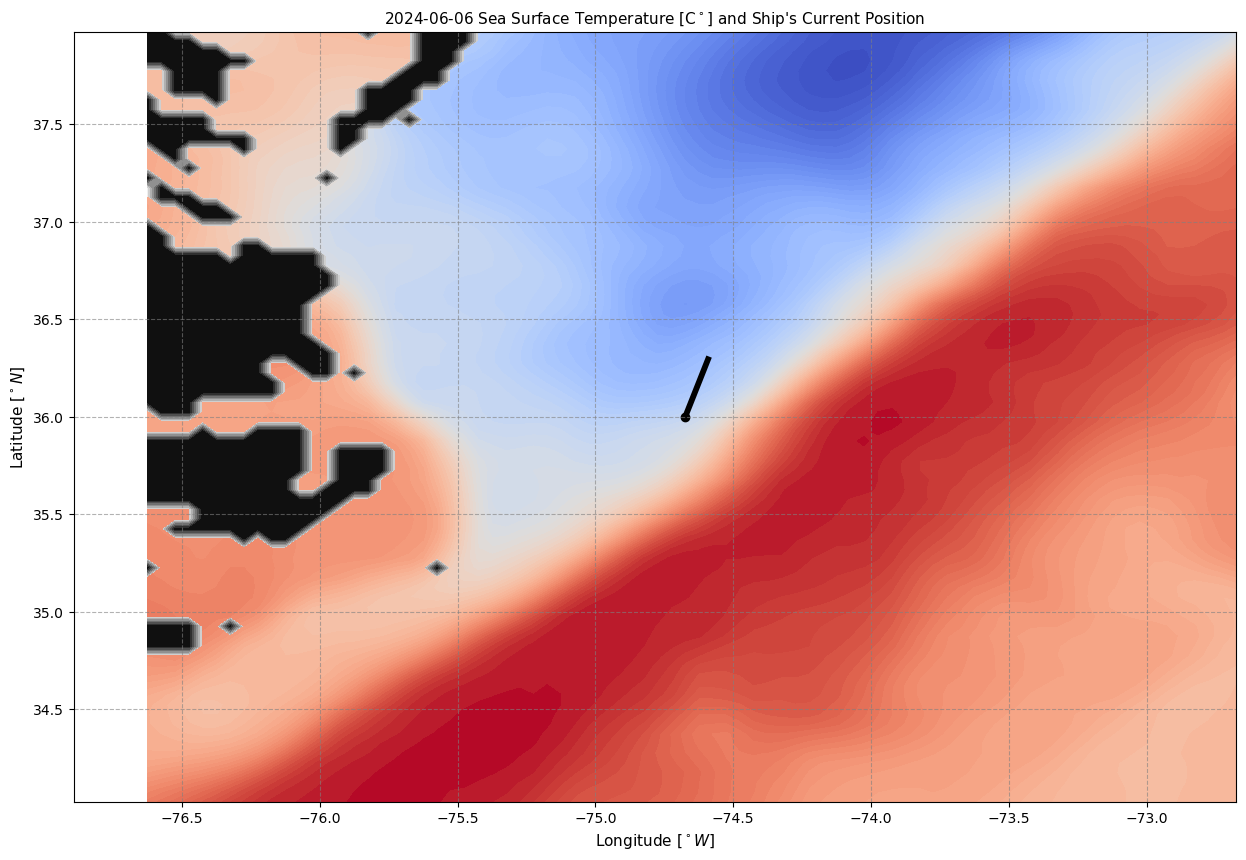

In [228]:
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 10))
ax1.contourf(mask_cut.y, mask_cut.x, mask_cut[:,:], cmap = "binary")
ax1.contourf(sst_cut.y, sst_cut.x, sst_cut[:, :], 100, cmap = "coolwarm")
# Once I have position I should be fine with heading from the gyro. 
ax1.grid(color = "grey", linestyle = '--', alpha = 0.6)# visible=None)
#c = ax1.contourf(lon[lon_idx], lat[lat_idx], sst[0, lat_idx, lon_idx], 100, cmap = "coolwarm")
#cbar = fig.colorbar(c)
ax1.quiver(pos[2], pos[3], np.cos(theta), np.sin(theta), headlength=0.0001, headaxislength=0.0001, width = 0.005)
ax1.scatter(pos[2], pos[3], color = "black")
ax1.scatter(prev_pos[:,2], prev_pos[:,3], marker = ',', color = "black", s = 0.5, alpha = 0.5)
# cbar.set_label("Sea Surface Temperature [C$^\circ$]")
ax1.set_xlabel("Longitude [$^\circ W$]", size = 11)
ax1.set_ylabel("Latitude [$^\circ N$]", size = 11)
ax1.set_title("2024-06-06 Sea Surface Temperature [C$^\circ$] and Ship's Current Position", size = 11);
plt.show()

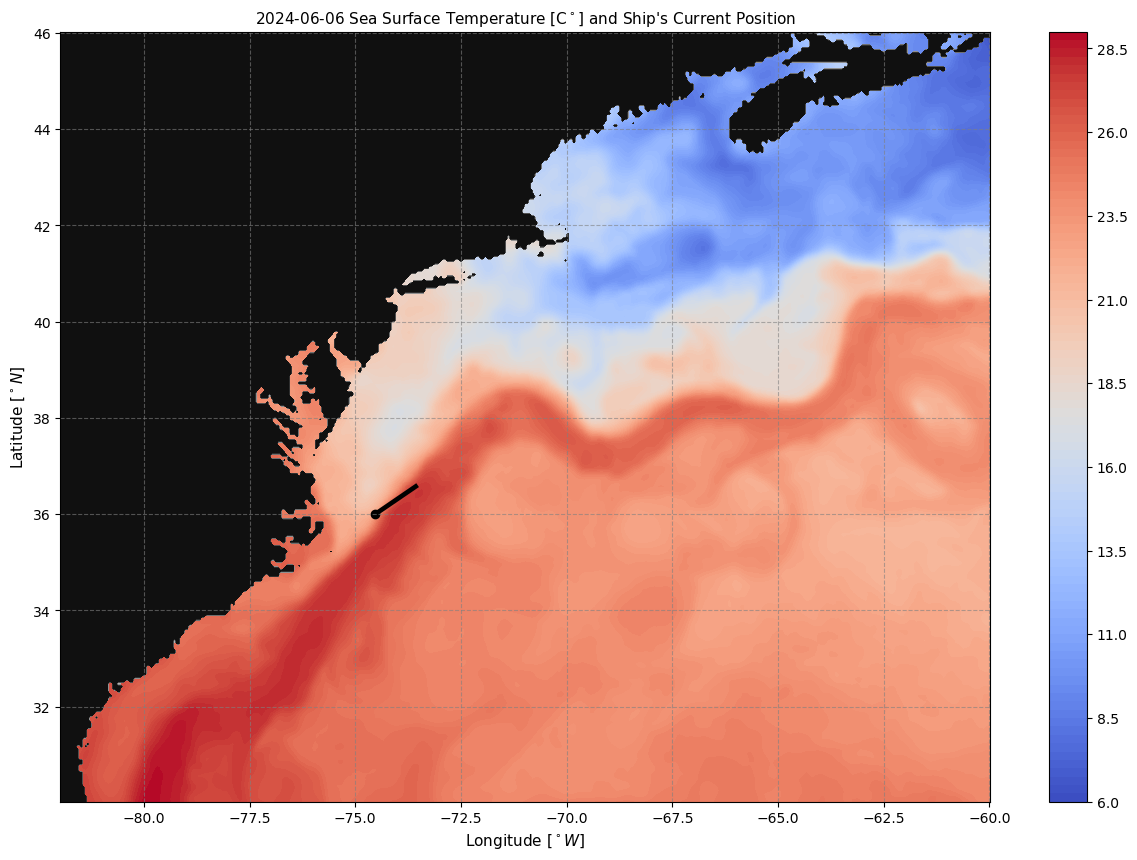

In [108]:
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 10))
ax1.contourf(lon, lat, mask[0,:,:], cmap = "binary")
ax1.contourf(lon, lat, sst[0,:,:], 100, cmap = "coolwarm")
# Once I have position I should be fine with heading from the gyro. 
ax1.grid(color = "grey", linestyle = '--', alpha = 0.6)# visible=None)
c = ax1.contourf(lon, lat, sst[0,:,:], 100, cmap = "coolwarm")
cbar = fig.colorbar(c)
ax1.quiver(pos[2], pos[3], np.cos(theta), np.sin(theta), headlength=0.0001, headaxislength=0.0001, width = 0.005)
ax1.scatter(pos[2], pos[3], color = "black")
ax1.scatter(prev_pos[:,2], prev_pos[:,3], marker = ',', color = "black", s = 0.5, alpha = 0.5)
# cbar.set_label("Sea Surface Temperature [C$^\circ$]")
ax1.set_xlabel("Longitude [$^\circ W$]", size = 11)
ax1.set_ylabel("Latitude [$^\circ N$]", size = 11)
ax1.set_title("2024-06-06 Sea Surface Temperature [C$^\circ$] and Ship's Current Position", size = 11);
plt.show()